In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Set heterogeneous labels {label: id}
hetero_labels = {"myelinmap": {"id": 41, "alpha": 12.0, "beta": 1.0}, 
                 "SAaxis": {"id": 5, "alpha": -0.6, "beta": 1.0}, 
                 "thickness": {"id": 6, "alpha": -0.7, "beta": 1.0}, 
                 "ndi": {"id": 4, "alpha": -0.45, "beta": 1.0},
                 #"odi": {"id": 3, "alpha": 1.0, "beta": 1.0}, 
                 "flumazenil": {"id": 4, "alpha": -0.05, "beta": 1.0}, 
                 "megtimescale": {"id": 3, "alpha": -0.45, "beta": 1.0}}

In [4]:
combs_best = {}
edge_fc_best = [] #np.full(len(hetero_labels) + 1, np.nan)
node_fc_best = [] #np.full(len(hetero_labels) + 1, np.nan)
fcd_best = [] #np.full(len(hetero_labels) + 1, np.nan)

# Load homogeneous results
homo_results = np.load(f"{PROJ_DIR}/results/model_rs/None/id-2/hetero-None_output.npz")
edge_fc_best.append(homo_results["edge_fc"])
node_fc_best.append(homo_results["node_fc"])
fcd_best.append(1 - homo_results["fcd"])

# Load the results for each hetero_label and ID comb
for hetero_label, data in hetero_labels.items():
    results_folder = f"{PROJ_DIR}/results/model_rs/{hetero_label}/id-{data['id']}"
    results_desc = f"hetero-{hetero_label}_alpha-{data['alpha']}_beta-{data['beta']}_r-28.9_gamma-0.116_output.npz"
    results_best = np.load(Path(results_folder, results_desc))

    edge_fc_best.append(results_best['edge_fc'])
    node_fc_best.append(results_best['node_fc'])
    fcd_best.append(1 - results_best['fcd'])

    # Load results
    # combs_df = pd.read_csv(f"{PROJ_DIR}/results/model_rs/{hetero_label}/id-{id}/csParamCombs.csv")
    # combs = combs_df.values
    # ncombs = len(combs)
    # # combs = combs[combs[:, 1] > 0]

    # best_comb = None
    # best_metric = -np.inf
    # for alpha, beta, cmean in combs:
    #     results_desc = f"hetero-{hetero_label}_alpha-{alpha}_beta-{beta}_cmean-{cmean}_output.npz"
    #     try:
    #         results = np.load(Path(results_folder, results_desc))
    #     except:
    #         continue

    #     combined_metric = np.mean(results['edge_fc']) + np.mean(results['node_fc']) + np.mean(1 - results['fcd'])
    #     if combined_metric > best_metric:
    #         best_metric = combined_metric
    #         best_alpha = alpha
    #         best_beta = beta
    
    # results_best = np.load(Path(results_folder, f"hetero-{hetero_label}_alpha-{best_alpha}_beta-{best_beta}_cmean-{cmean}_output.npz"))
    # combs_best[hetero_label] = {"alpha": best_alpha, "beta": best_beta}


Text(0.5, 1.0, '1 - FCD')

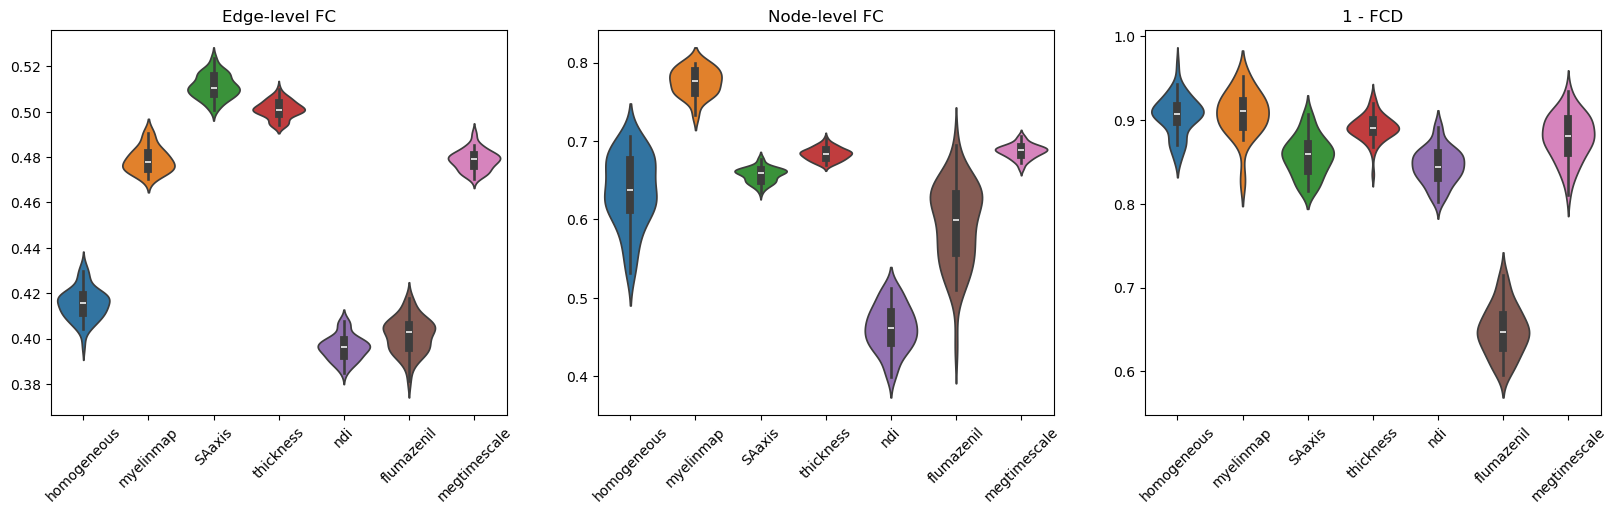

In [5]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs = axs.flatten()

labels = ["homogeneous"] + list(hetero_labels.keys())

sns.violinplot(data=edge_fc_best, ax=axs[0])
axs[0].set_xticks(ticks=range(len(labels)), labels=labels)
axs[0].tick_params(axis='x', labelrotation=45)
axs[0].set_title("Edge-level FC")

sns.violinplot(data=node_fc_best, ax=axs[1])
axs[1].set_xticks(ticks=range(len(labels)), labels=labels)
axs[1].tick_params(axis='x', labelrotation=45)
axs[1].set_title("Node-level FC")

sns.violinplot(data=fcd_best, ax=axs[2])
axs[2].set_xticks(ticks=range(len(labels)), labels=labels)
axs[2].tick_params(axis='x', labelrotation=45)
axs[2].set_title("1 - FCD")